In [1]:
# visualizing the federal funds rate using FRED API

In [2]:
import json
import datetime as dt
import matplotlib as mpl
from fredapi import Fred
import requests
import pandas as pd
import yfinance as yf
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates, ticker


# Load the config file
with open('keys.json', 'r') as keys_file:
    keys = json.load(keys_file)

# Access the API keys
fred_key = keys['FRED_API']

fred = Fred(api_key=fred_key)

In [3]:
fred.search('federal funds rate')
FedFunds = fred.get_series_latest_release('FEDFUNDS')
FedFunds = FedFunds.reset_index()
FedFunds.columns = ["Date", "Rate"]
Date = FedFunds['Date']
Rate = FedFunds['Rate']
last_rate = Rate.tail(1).item()

In [4]:
# Stats
Mean = FedFunds['Rate'].mean()
Median = FedFunds['Rate'].median()
Mode = FedFunds['Rate'].mode()
STD = FedFunds['Rate'].std()

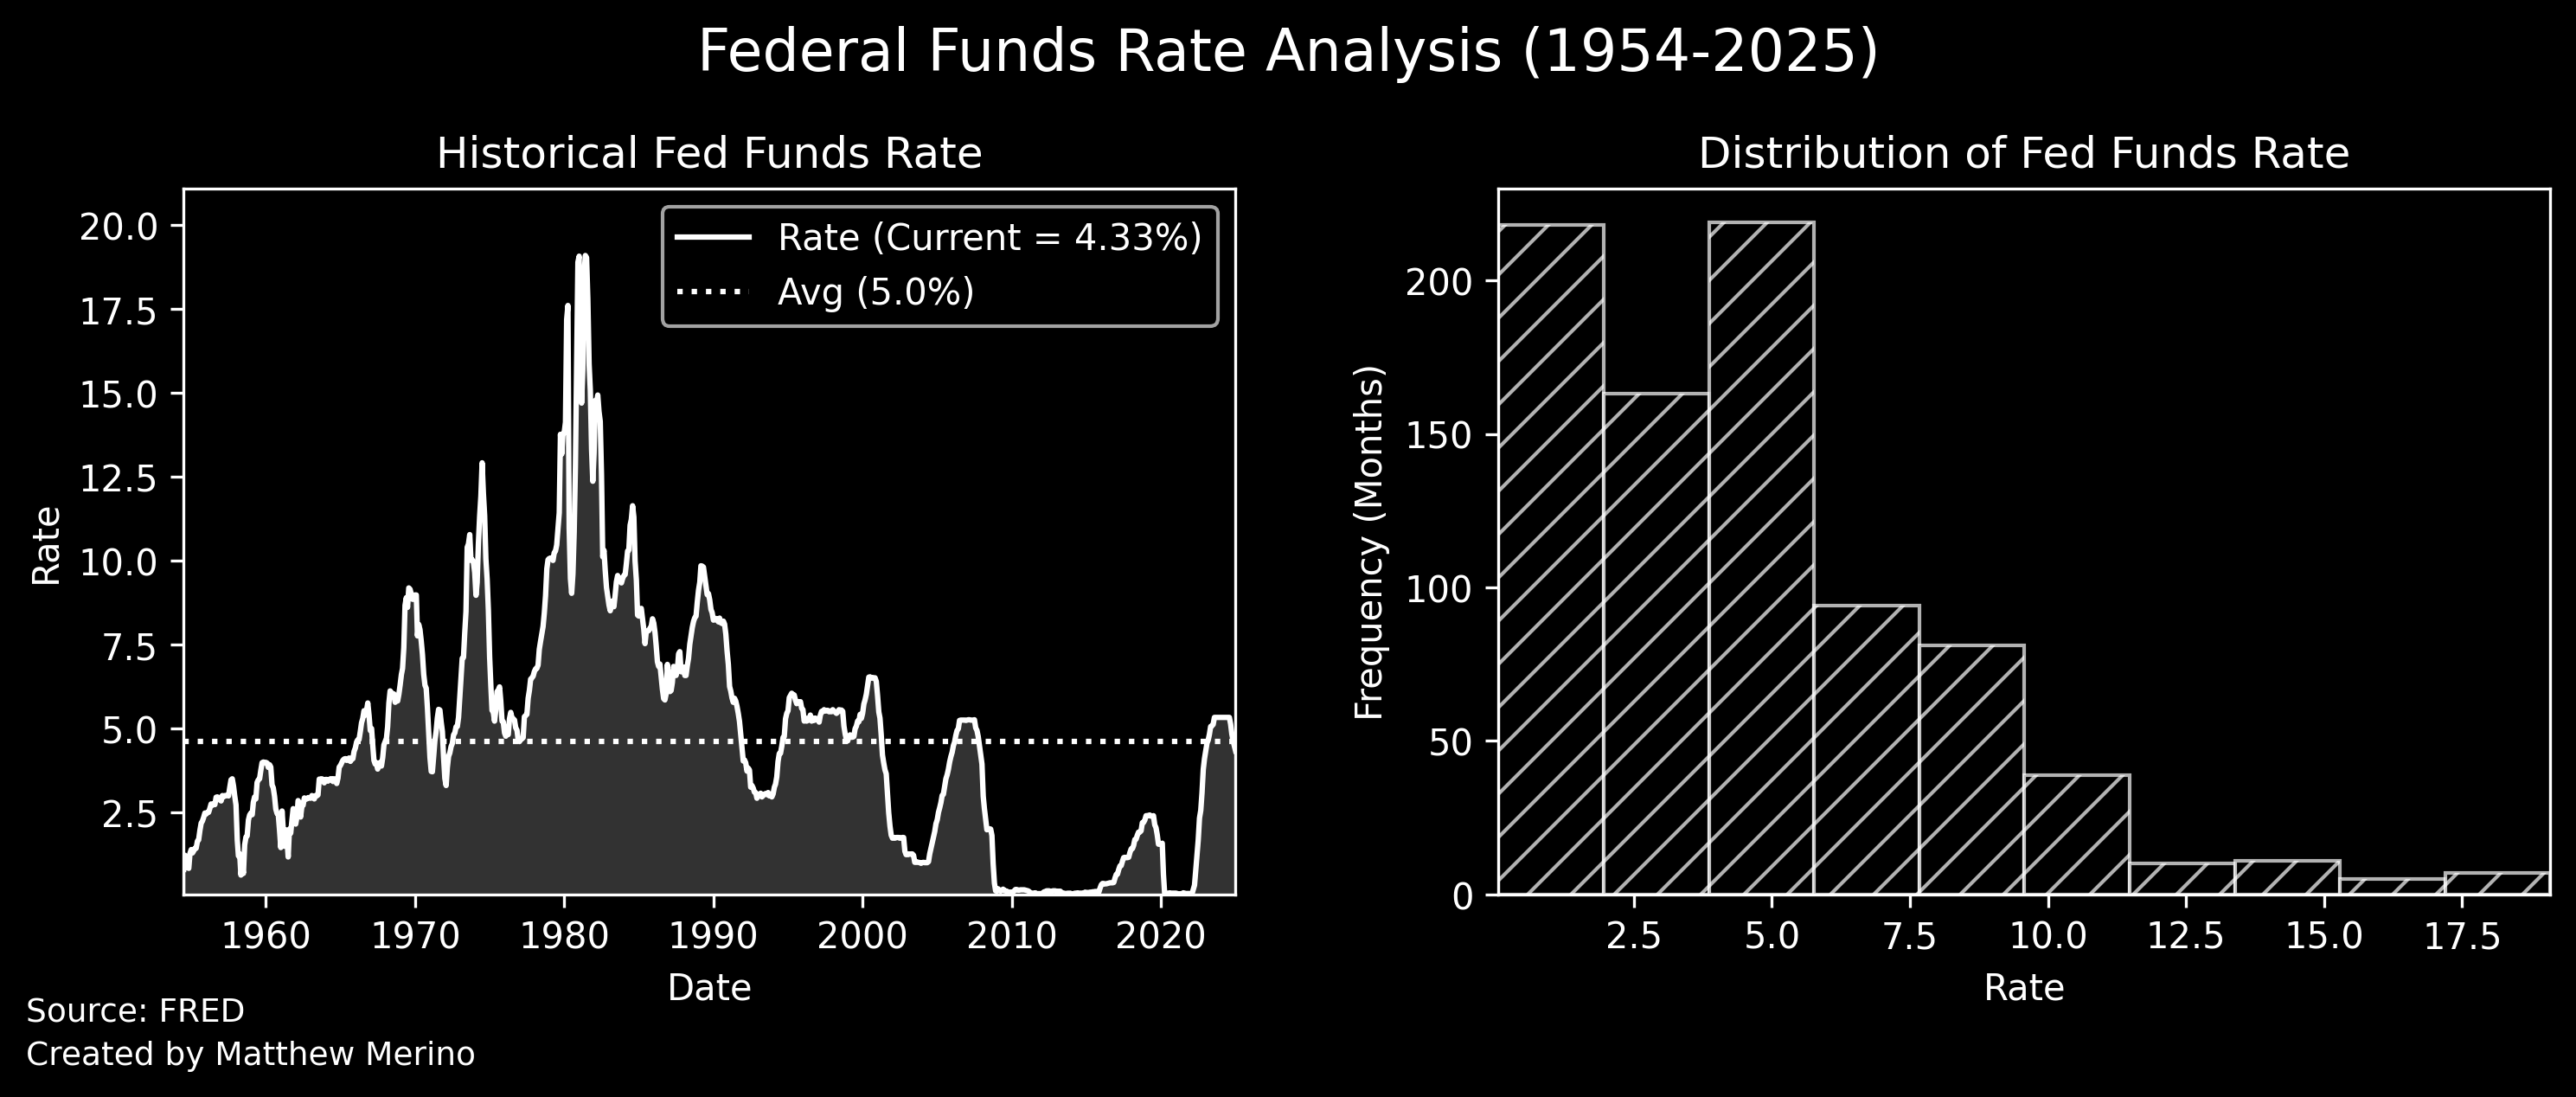

In [5]:
# Plots
plt.style.use('dark_background')
fig, axs = plt.subplots(1,2, figsize=(10, 4), dpi=300) # 1 row 2 columns
fig.suptitle('Federal Funds Rate Analysis (1954-2025)', fontsize=16)
fig.text(-1.4,-.19, 'Source: FRED',transform=plt.gca().transAxes, fontsize=9, verticalalignment='bottom')
fig.text(-1.4,-.25, 'Created by Matthew Merino',transform=plt.gca().transAxes, fontsize=9, verticalalignment='bottom')

axs[0].plot(FedFunds['Date'],FedFunds['Rate'], label='Rate (Current = '+str(last_rate)+"%)", color='white')
axs[0].set_title("Historical Fed Funds Rate")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Rate')
axs[0].set_xlim(min(FedFunds['Date']),max((FedFunds['Date'])))
axs[0].set_ylim(min(FedFunds['Rate']),max((FedFunds['Rate'])+2)) # Added +2 so that the full range is in view
axs[0].axhline(Mean, label="Avg ("+str(Mean.round())+"%)", linestyle=":")
axs[0].legend(loc='best')
axs[0].fill_between(FedFunds['Date'],FedFunds['Rate'], color='white',alpha=0.2)

axs[1].hist(FedFunds['Rate'], color='black',alpha=0.7,edgecolor='white', hatch='//')
axs[1].set_title("Distribution of Fed Funds Rate")
axs[1].set_xlabel('Rate')
axs[1].set_ylabel('Frequency (Months)')
axs[1].set_xlim(min(FedFunds['Rate']),max((FedFunds['Rate'])))

plt.tight_layout(pad=1)
plt.subplots_adjust(wspace=0.25)
plt.show()